In [29]:
import os 
import glob
import zipfile
import dolfyn as dlfn
import xarray as xr
import pandas as pd
import numpy as np
from dolfyn.adp import api
from matplotlib import pyplot as plt
import matplotlib.dates as dt

In [23]:
# READ AD2CP FILES AND MERGE
wdir     = os.path.join('c:/','Users','sa01ld','OneDrive - SAMS','Projects','Autonaut-EE', 'Non-Acoustic data','process-raw')
zdir     = os.path.join('c:/','Users','sa01ld','OneDrive - SAMS','Projects','Autonaut-EE', 'Non-Acoustic data','process-raw','zipped-files')
indir    = os.path.join(wdir + '/*.sigVM')

# deal with the file formats. Change file extensions to zip from sigVM and unzip
fname =glob.glob(indir)

if fname:
    for i in fname:
        print(i)
        bn = os.path.splitext(os.path.basename(i))[0]
        old=i
        new=os.path.join(zdir,bn+'.zip')
        os.rename(old, new)
        
indir    = os.path.join(zdir + '/*.zip')        
fname =glob.glob(indir)
fname 

if fname:
    for i in fname:
        with zipfile.ZipFile(i,"r") as zip_ref:
            zip_ref.extractall(zdir)

# GET ALL AD2CP FILES 
ad2cpdir= os.path.join(zdir + '/*.AD2CP')
fname =glob.glob(ad2cpdir)

# GET ALL NMEA FILES
ndir     = os.path.join('c:/','Users','sa01ld','OneDrive - SAMS','Projects','Autonaut-EE', 'Non-Acoustic data','batch-process-GNSS')
nmdir    = os.path.join(ndir + '/*_Data')
nmname =glob.glob(nmdir)

# set variables for append
GPSEast=[]
GPSNorth=[]
VEast=[]
VNorth=[]

first = True

for i,j in zip(fname,nmname):
        if i in ['c:/Users\\sa01ld\\OneDrive - SAMS\\Projects\\Autonaut-EE\\Non-Acoustic data\\process-raw\\zipped-files\\101512_20211008T190648UTC.AD2CP','c:/Users\\sa01ld\\OneDrive - SAMS\\Projects\\Autonaut-EE\\Non-Acoustic data\\process-raw\\zipped-files\\101512_20211008T130648UTC.AD2CP','c:/Users\\sa01ld\\OneDrive - SAMS\\Projects\\Autonaut-EE\\Non-Acoustic data\\process-raw\\zipped-files\\101512_20210805T010703UTC.AD2CP']:
            bn = os.path.splitext(os.path.basename(i))[0] # unique file ID
            print('skipping ' + bn)
            continue
        
        # read csv files and extract lat and long data
        bn = os.path.splitext(os.path.basename(i))[0] # unique file ID
        csvpath=os.path.join(j,bn+'.csv')
        df=pd.read_csv(csvpath) # nav data   
        
        # GPS derived velocities
        GPSEast.append(df.GPSEast.values)
        GPSNorth.append(df.GPSNorth.values)
        VEast.append(df.VEast.values)
        VNorth.append(df.VNorth.values)

        
        da = dlfn.read(i) # adcp data  
        # rotate to earth coordinates
        dlfn.rotate2(da, 'earth', inplace=True)
        # merge the ADCP dat sets
        if first:
            first = False
            ds=da
        else:
            ds=xr.merge([ds,da])
            
VEast=np.concatenate(VEast)
    

Reading file c:/Users\sa01ld\OneDrive - SAMS\Projects\Autonaut-EE\Non-Acoustic data\process-raw\zipped-files\101512_20210803T080024UTC.AD2CP ...
Reading file c:/Users\sa01ld\OneDrive - SAMS\Projects\Autonaut-EE\Non-Acoustic data\process-raw\zipped-files\101512_20210803T115712UTC.AD2CP ...
Reading file c:/Users\sa01ld\OneDrive - SAMS\Projects\Autonaut-EE\Non-Acoustic data\process-raw\zipped-files\101512_20210803T122249UTC.AD2CP ...
Reading file c:/Users\sa01ld\OneDrive - SAMS\Projects\Autonaut-EE\Non-Acoustic data\process-raw\zipped-files\101512_20210803T123800UTC.AD2CP ...
Reading file c:/Users\sa01ld\OneDrive - SAMS\Projects\Autonaut-EE\Non-Acoustic data\process-raw\zipped-files\101512_20210803T134245UTC.AD2CP ...
Reading file c:/Users\sa01ld\OneDrive - SAMS\Projects\Autonaut-EE\Non-Acoustic data\process-raw\zipped-files\101512_20210803T134759UTC.AD2CP ...
Reading file c:/Users\sa01ld\OneDrive - SAMS\Projects\Autonaut-EE\Non-Acoustic data\process-raw\zipped-files\101512_20210803T13524

In [24]:
ds

<xarray.Dataset>
Dimensions:              (beam: 4, dir: 4, dirIMU: 3, earth: 3, inst: 3, q: 4, range: 17, time: 350766, time_bt: 350766, x*: 4)
Coordinates:
  * time                 (time) float64 1.628e+09 1.628e+09 ... 1.634e+09
  * time_bt              (time_bt) float64 1.628e+09 1.628e+09 ... 1.634e+09
  * dir                  (dir) int32 1 2 3 4
  * dirIMU               (dirIMU) <U1 'X' 'Y' 'Z'
  * beam                 (beam) int32 1 2 3 4
  * range                (range) float64 5.0 9.0 13.0 17.0 ... 61.0 65.0 69.0
  * earth                (earth) <U1 'E' 'N' 'U'
  * inst                 (inst) <U1 'X' 'Y' 'Z'
  * q                    (q) <U1 'w' 'x' 'y' 'z'
  * x*                   (x*) int32 1 2 3 4
Data variables: (12/50)
    c_sound              (time) float32 1.5e+03 1.5e+03 ... 1.5e+03 1.5e+03
    temp                 (time) float32 17.83 17.83 17.83 ... 14.97 14.97 14.97
    pressure             (time) float32 0.618 0.619 0.619 ... 0.93 0.888 0.909
    heading              (time) float32 39.82 40.25 40.48 ... 211.4 212.3 211.7
    pitch                (time) float32 -0.31 -0.31 -0.29 ... 4.25 1.86 3.66
    roll                 (time) float32 179.4 179.4 179.4 ... -179.2 -178.8
    ...                   ...
    dist_bt              (dir, time_bt) float32 -1.0 -1.0 -1.0 ... -1.0 -1.0
    orientmat_bt         (earth, inst, time_bt) float32 0.6406 ... -0.9968
    angrt_bt             (dirIMU, time_bt) float32 -0.0009766 0.0 ... 0.04004
    quaternion_bt        (q, time_bt) float32 0.005859 0.005829 ... -0.02777
    fom_bt               (dir, time_bt) float64 6.554e+04 ... 6.554e+04
    beam2inst_orientmat  (beam, x*) float32 1.183 0.0 -1.183 ... 0.0 0.5518

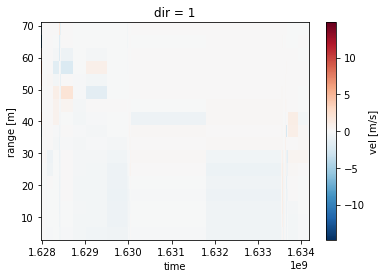

In [25]:
%matplotlib inline
ds.vel.sel(dir=1, range=slice(0,70)).plot()

Earth: When the data object is in ‘earth’ coordinates, the first dimension of vectors are: [East, North, Up, …]. This coordinate system is also sometimes denoted as “ENU”. If the declination is set the earth coordinate system is “True-East, True-North, Up” otherwise, East and North are magnetic. See the Declination Handling section for further details on setting declination.

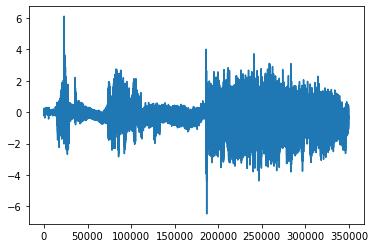

In [34]:
plt.plot(VEast)

In [ ]:
Evel=dd.vel.sel(dir=1,range=5)
Nvel=dd.vel.sel(dir=2,range=5)


In [ ]:
%matplotlib inline
ds.corr.sel(beam=1, range=slice(0,70)).plot()

In [ ]:
ds = api.clean.correlation_filter(ds, thresh=50)

%matplotlib inline
ds.corr.sel(beam=1, range=slice(0,70)).plot()

In [ ]:
ds_avg['U_mag'] = ds_avg.velds.U_mag
ds_avg['U_dir'] = ds_avg.velds.U_dir
ds_avg['U_dir'].data = dlfn.tools.misc.convert_degrees(ds_avg['U_dir'].values, tidal_mode=True)

%matplotlib inline
ax = plt.figure(figsize=(12,8)).add_axes([.14, .14, .8, .74])
# Plot the horizontal velocity magnitude
t = dlfn.time.dt642date(ds_avg.time)
plt.pcolormesh(t, ds_avg.range, ds_avg['U_mag'], cmap='Blues', shading='nearest')
# Plot the water surface
ax.plot(t, ds_avg.depth)

# Set up time on x-axis
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(dt.DateFormatter('%H:%M'))

ax.set_ylabel('Altitude [m]')
ax.set_ylim([0, 12])
plt.colorbar(label='Horizontal Vel [m/s]')